In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from src.models.win_prediction import agg_by_pos

In [2]:
pca_model_path = '../models'
df = pd.read_csv('../data/processed/player_data_clean.csv')
df = agg_by_pos(df, team_df='../data/interim/NBA_team_stats_1979-2024_clean.csv', save_file=False, use_pca=False)

In [3]:
df

,experienceC,fg_per_100_possC,fga_per_100_possC,x3p_per_100_possC,x3pa_per_100_possC,x2p_per_100_possC,x2pa_per_100_possC,ft_per_100_possC,fta_per_100_possC,orb_per_100_possC,...,wsSF,ws_48SF,obpmSF,dbpmSF,bpmSF,vorpSF,person_idSF,heightSF,weightSF,W%
0,7.000000,7.500000,13.900000,0.000000,0.000000,7.500000,13.900000,5.700000,8.500000,5.200000,...,1.400000,0.025000,-0.200000,-2.000000,-2.100000,-0.100000,1.110000e+02,80.000000,240.000000,0.341
1,6.085358,5.414879,11.127564,0.000000,0.000000,5.414879,11.089271,5.157557,7.536336,6.206343,...,3.100000,0.131000,0.300000,0.300000,0.600000,0.800000,6.730000e+02,81.000000,240.000000,0.305
2,7.561709,6.232848,11.639651,0.000000,0.028766,6.232848,11.582120,4.797279,6.968513,5.242468,...,2.800000,0.049000,1.000000,-1.800000,-0.800000,0.800000,7.540000e+02,78.000000,220.000000,0.402
3,2.000000,7.000000,17.100000,0.000000,0.000000,7.000000,17.100000,4.200000,9.100000,5.600000,...,3.191154,0.082642,-0.690967,-0.433375,-1.150715,0.608038,9.194319e+02,79.000000,234.725502,0.341
4,5.855107,6.518426,14.169766,0.000000,0.040787,6.518426,14.128979,4.686936,6.742212,5.292128,...,4.582300,0.092259,0.341972,0.379014,0.720986,1.587105,2.740855e+03,80.532238,217.983569,0.451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,8.429469,8.841786,16.127184,0.044965,0.157377,8.819303,15.969808,3.135941,4.705502,3.869751,...,4.416016,0.098963,-0.815677,0.504004,-0.311673,1.276315,5.274170e+05,79.544622,199.138446,0.524
551,9.611630,7.402010,13.150538,0.434458,0.920029,6.967552,12.230510,2.136827,3.399210,4.137976,...,6.578860,0.130302,0.265083,0.556888,0.821971,1.975059,7.458626e+05,79.237530,199.906176,0.390
552,9.568575,6.307989,12.699068,0.166378,1.455193,6.146405,11.258056,3.757390,5.258655,5.181758,...,5.049394,0.107883,-0.114208,0.751176,0.625731,1.527857,5.262295e+05,79.293419,206.908292,0.347
553,6.258272,8.428857,14.974173,1.049764,3.134809,7.379093,11.818780,2.836248,4.418715,4.090782,...,1.937539,0.065313,-1.748665,-0.220596,-1.969261,0.030037,1.629008e+06,79.203147,201.966845,0.427


## Simple Linear Regression

In [4]:
X, y = df.drop(columns='W%'), df['W%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Test Scores')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Test Scores
Mean Squared Error: 0.05319046256572641
R^2 Score: -1.5180764913907


## Random Forest

In [5]:
rf_reg = RandomForestRegressor(random_state=41)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Test Scores')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Test Scores
Mean Squared Error: 0.018414609039639637
R^2 Score: 0.1282385622503378


In [6]:
y_train_pred = rf_reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print('Train Scores')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Train Scores
Mean Squared Error: 0.002408521529954958
R^2 Score: 0.8728576934271934


## Gradient Boosted Trees

In [7]:
cat_reg = CatBoostRegressor(iterations=1000,
                            learning_rate=0.01,
                            depth=6, l2_leaf_reg=3,
                            bagging_temperature=1,
                            early_stopping_rounds=50,
                            loss_function='RMSE',
                            random_state=41,
                            logging_level='Silent',
                            allow_writing_files=False)
cat_reg.fit(X_train, y_train)
y_pred = cat_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Test Scores')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Test Scores
Mean Squared Error: 0.01792204787767027
R^2 Score: 0.15155677801119016


In [8]:
y_train_pred = cat_reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print('Train Scores')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Train Scores
Mean Squared Error: 0.002026414418943473
R^2 Score: 0.8930285654113771


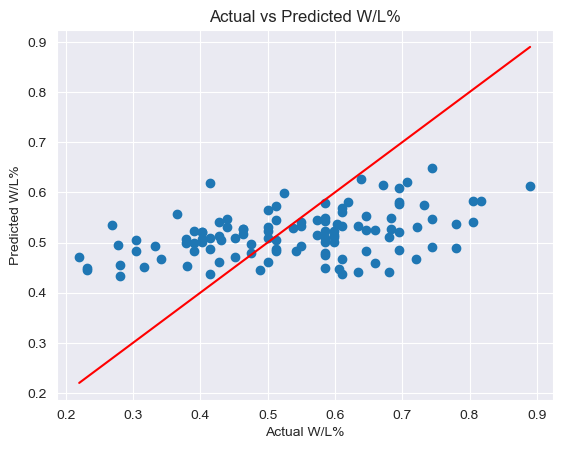

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual W/L%')
plt.ylabel('Predicted W/L%')
plt.title('Actual vs Predicted W/L%')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

## Ridge Regression

In [10]:
X, y = df.drop(columns='W%'), df['W%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ridge_reg = Ridge(alpha=10).fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Test Scores')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Test Scores
Mean Squared Error: 0.026409146860836685
R^2 Score: -0.25022886924106547


# Alternate Training Set (Pazin's)

In [11]:
data_path = '../data/interim/NBA_team_player_stats_Year_Adjusted.csv'
df = pd.read_csv(data_path)
X = df.drop(columns=['W/L%', 'Season', 'Team'])
y = df['W/L%']

## Ridge Regression GridSearchCV

In [12]:
ridge_params = {'alpha': [1, 10, 100, 1000, 10000, 100000, 1000000]}
ridge = Ridge()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ridge_grid_search = GridSearchCV(ridge, ridge_params, cv=5, n_jobs=-1)
ridge_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 10, 100, 1000, 10000, 100000, 1000000]})

In [13]:
ridge_grid_search.best_estimator_

Ridge(alpha=10000)

In [14]:
model = Ridge(alpha=10000, random_state=41)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Test Scores')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print('Train Scores')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Test Scores
Mean Squared Error: 0.00989886236699578
R^2 Score: 0.47499920477559454
Train Scores
Mean Squared Error: 0.007850166382460628
R^2 Score: 0.6000918539308011


## GridSearch Boosted Trees

parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'iterations': [100, 200, 500],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0, 1, 2, 3],
    'random_strength': [1, 2, 5]
}
catboost_model = CatBoostRegressor(random_state=41, logging_level='Silent', allow_writing_files=False, loss_function='RMSE')
catboost_gridsearch = GridSearchCV(estimator=catboost_model, param_grid=parameters, cv=3, n_jobs=-1, verbose=2)
catboost_gridsearch.fit(X_train, y_train)

best_params = catboost_gridsearch.best_params_
best_model = catboost_gridsearch.best_estimator_

print(f'Best Parameters: {best_params}')

In [19]:
parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'iterations': [100, 200, 500],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0, 1, 2, 3],
    'random_strength': [1, 2, 5]
}

for learning_rate in parameters['learning_rate']:
    for depth in parameters['depth']:
        for iterations in parameters['iterations']:
            for l2_leaf_reg in parameters['l2_leaf_reg']:
                for border_count in parameters['border_count']:
                    for bagging_temperature in parameters['bagging_temperature']:
                        for random_strength in parameters['random_strength']:
                            results_df = pd.DataFrame(columns=['Learning Rate', 'Depth', 'Iterations', 'L2 Leaf Reg.', 'Border Count', 'Bagging Temp.', 'Random Strength', 'Mean Squared Error', 'R^2 Score'])
                            
                            print(f'Learning Rate: {learning_rate} | Depth: {depth} | Iterations: {iterations} | L2 Leaf Reg.: {l2_leaf_reg} | Border Count: {border_count} | Bagging Temp.: {bagging_temperature} | Random Strength: {random_strength}')
                            
                            cat_reg = CatBoostRegressor(iterations=iterations,
                                                        learning_rate=learning_rate,
                                                        depth=depth,
                                                        l2_leaf_reg=l2_leaf_reg,
                                                        bagging_temperature=bagging_temperature,
                                                        border_count=border_count,
                                                        random_strength=random_strength,
                                                        loss_function='RMSE',
                                                        random_state=41,
                                                        logging_level='Silent',
                                                        allow_writing_files=False)
                            cat_reg.fit(X_train, y_train)
                            y_pred = cat_reg.predict(X_test)
                            mse = mean_squared_error(y_test, y_pred)
                            r2 = r2_score(y_test, y_pred)
                            
                            new_row = {'Learning Rate': [learning_rate],
                                       'Depth': [depth],
                                       'Iterations': [iterations],
                                       'L2 Leaf Reg.': [l2_leaf_reg],
                                       'Border Count': [border_count],
                                       'Bagging Temp.': [bagging_temperature],
                                       'Random Strength': [random_strength],
                                       'Mean Squared Error': [mse],
                                       'R^2 Score': [r2]
                                       }

                            results_df = pd.concat([results_df, pd.DataFrame(new_row)], ignore_index=True)

                            print('Test Scores')
                            print(f'Mean Squared Error: {mse}')
                            print(f'R^2 Score: {r2}')


Learning Rate: 0.01 | Depth: 4 | Iterations: 100 | L2 Leaf Reg.: 1 | Border Count: 32 | Bagging Temp.: 0 | Random Strength: 1
Test Scores
Mean Squared Error: 0.013410558124431957
R^2 Score: 0.2887512303227794
Learning Rate: 0.01 | Depth: 4 | Iterations: 100 | L2 Leaf Reg.: 1 | Border Count: 32 | Bagging Temp.: 0 | Random Strength: 2
Test Scores
Mean Squared Error: 0.014108939625095008
R^2 Score: 0.25171153529271406
Learning Rate: 0.01 | Depth: 4 | Iterations: 100 | L2 Leaf Reg.: 1 | Border Count: 32 | Bagging Temp.: 0 | Random Strength: 5
Test Scores
Mean Squared Error: 0.015340646094570289
R^2 Score: 0.18638616233737526
Learning Rate: 0.01 | Depth: 4 | Iterations: 100 | L2 Leaf Reg.: 1 | Border Count: 32 | Bagging Temp.: 1 | Random Strength: 1
Test Scores
Mean Squared Error: 0.013410558124431957
R^2 Score: 0.2887512303227794
Learning Rate: 0.01 | Depth: 4 | Iterations: 100 | L2 Leaf Reg.: 1 | Border Count: 32 | Bagging Temp.: 1 | Random Strength: 2
Test Scores
Mean Squared Error: 0.01

KeyboardInterrupt: 

In [ ]:
results_df